# Dermatoscopic Image Classification Using Transfer Learning

<a id='Content'></a>
## Content
- **[Part 1 - Project Overview](#Part1_Project_Overview)**  
  - **[General Information](#Part1_General_Information)**  
  - **[Dataset Introduction](#Part1_Dataset_Introduction)**
  - **[Deep Learning Environment](#Part1_Deep_Learning_Environment)**
  
- **[Part 2 - Project Implementation - Dataset Explortory Analysis](#Part2_Dataset_Explortory_Analysis)**
  - **[Data Virtualization](#Part2_Data_virtualization)**  
  - **[Train Test Split](#Part2_train_test_split)**
  
- **[Part 3 - Project Implementation - Data Augmentation](#Part3_Data_Augmentation)**
  - **[Data Augmentation for each type](#Part3_Data_Augmentation_each_tpye)**
  - **[Augmentation Data Virtualization](#Part3_Data_virtualization)**  
  
- **[Part 4 - Project Implementation - Transfer Learning using VGG19](#Part4_VGG19)**
  - **[Training Preparation](#Part4_Training_preparation)**
  - **[Create model based on vgg19 structure](#Part4_Create_structure)**
  - **[Start a Session for training](#Part4_Start_Session)**
  - **[Main function to start model training and generate performance report](#Part4_Main_function)**
  - **[Read report file of model performance](#VGG19_1_result)**
  
- **[Part 5 - Project Implementation - Load model and train for more epoch](#Part5_VGG19_More)**
  - **[Pretrained Model Loading](#Part5_Pretrained_Model_Loading)**
  - **[Start a Session for more training](#Part5_Main_train)**
  - **[Read report file of model performance](#Part5_Read_report)**
  - **[ROC Rurve](#Part5_ROC_Curve)**
  
- **[Part 6 - Project Implementation - Transfer Learning using ResNet50](#Part6_ResNet50)**
  - **[Create model based on vgg19 structure](#Part6_Create_structure)**
  - **[Read report file of model performance](#Part6_Read_report)**
  
- **[Part 7 - Result and Conclusion](#Part7_Result)**
- **[Part 8 - Reference](#Part8_Project_Overview)**
- **[Part 9 - License](#Part9_License)**

<a id='Part1_Project_Overview'></a>
## Part 1 - Project Overview
<a id='Part1_General_Information'></a>
### General Information

- This project is about ***Skin Cancer*** - Dermatoscopic Image Classification Using ransfer Learning

- This project choose this as topic to classify the images into diverse types of skin cancer. 
    - This project used basic features provided by dataset, proposed several new features to improve the accuracy, and applied deep learning algorithm CNN, ***transfer learning*** and two popular models ***VGGNet*** and ***ResNet*** model. 
    - The best result is of ***82% accuracy***.

<a id='Part1_Dataset_Introduction'></a>
### Dataset Introduction

Another more interesting than digit classification dataset to use to get biology and medicine students more excited about machine learning and image processing.

- ***Original Data Source***: https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/DBW86T  
- ***Related Publication***: Tschandl, P., Rosendahl, C. & Kittler, H. The HAM10000 dataset, a large collection of multi-source dermatoscopic images of common pigmented skin lesions. Sci. Data 5, 180161 (2018). doi: 10.1038/sdata.2018.161  
- Training of neural networks for automated diagnosis of pigmented skin lesions is hampered by the small size and lack of diversity of available dataset of dermatoscopic images. We tackle this problem by releasing the HAM10000 ("Human Against Machine with 10000 training images") dataset. We collected dermatoscopic images from different populations, acquired and stored by different modalities. The final dataset consists of 10015 dermatoscopic images which can serve as a training set for academic machine learning purposes. Cases include a representative collection of all important diagnostic categories in the realm of pigmented lesions: Actinic keratoses and intraepithelial carcinoma / Bowen's disease (akiec), basal cell carcinoma (bcc), benign keratosis-like lesions (solar lentigines / seborrheic keratoses and lichen-planus like keratoses, bkl), dermatofibroma (df), melanoma (mel), melanocytic nevi (nv) and vascular lesions (angiomas, angiokeratomas, pyogenic granulomas and hemorrhage, vasc).
- More than 50% of lesions are confirmed through histopathology (histo), the ground truth for the rest of the cases is either follow-up examination (follow_up), expert consensus (consensus), or confirmation by in-vivo confocal microscopy (confocal). The dataset includes lesions with multiple images, which can be tracked by the lesion_id-column within the HAM10000_metadata file.

![title](Support Files/kagglecsv.png)

![title](Support Files/ScreenShot.png)

<a id='Part1_Deep_Learning_Environment'></a>
### Deep Learning Environment

#### 1. Cloud Computing Platform
   - ***Amazon Elastic Compute Cloud (Amazon EC2)*** is a web service that provides secure, resizable compute capacity in the cloud.  
   - ***Amazon EC2 P3 instances*** deliver high performance compute in the cloud with up to 8 NVIDIA® Tesla® V100 GPUs and up to 100 Gbps of networking throughput for machine learning and HPC applications. These instances deliver up to one petaflop of mixed-precision performance per instance to significantly accelerate machine learning and high performance computing applications.  
   - ***AWS Deep Learning AMIs*** provide machine learning practitioners and researchers with the infrastructure and tools to accelerate deep learning in the cloud, at any scale. You can quickly launch Amazon EC2 instances pre-installed with popular deep learning frameworks such as Apache MXNet and Gluon, TensorFlow, Microsoft Cognitive Toolkit, Caffe, Caffe2, Theano, Torch, PyTorch, Chainer, and Keras to train sophisticated, custom AI models, experiment with new algorithms, or to learn new skills and techniques.
   
#### 2. AWS EC2 Instance Creatation
   - Before getting start, create a ticket for AWS Support to request for increaseing the limitation of P3 Instance.
   - Go to AWS Console, select ec2 to get into **ec2 concole**.
   - Click **Launch Instance**.
   - Select **Deep Learning AMI (Ubuntu) Version 19.0 - ami-09b2c3552ee7a8b53** as your instance ami, then next.
   - Select **p3.2xlarge** as your instance type under GPU Compute, then next.
   - Use default configuration, then next.
   - Add storage, (about 150 GB in this case), then next.
   - No need to add flag, clik next.
   - Add inbound rule for **Custome TCP Rule** at port **8888** for further Jupyter usage, set IP to be **anywhere**, then next.
   - Review and launch the instance.
   - Create **pem file** to be your unique key for logging ec2.
   
#### 3. SSH Connection to ec2 instance
   - Use **chmod 400 yourpem.pem** to change permission access.
   - Use **ssh -i ~/yourpem.pem -L 8157:127.0.0.1:8888 ubuntu@dns-adress** to connect to ec2.
   - Use **source activate tensorflow_p36** to activate your tensorflow_python3 environment.
   - Delete anaconda2 beacuse we just use anaconda3 as our environment.
   - For file transfer between your laptop and ec2 details, check https://angus.readthedocs.io/en/2014/amazon/transfer-files-between-instance.html

#### 4. Jupyter Notebook Configuration
   - Run **cd /home/USERNAME/.jupyter/**
   - Run **jupyter notebook password**, and set your password
   - Run **cat /Users/you/.jupyter/jupyter_notebook_config.json** to copy your password
   - Modify your jupyter config file **/Users/you/.jupyter/jupyter_notebook_config.py**
       - c.NotebookApp.ip = '*'
       - c.NotebookApp.password = u'sha1:your hashed password here'
       - c.NotebookApp.open_browser = False
   - Make sure you are in **tensorflow_p36** conda environment, run **jupyter notebook**
   - Go to your browser, enter **127.0.0.1:8157** to logging in your ec2 jupyter notebook

#### 5. Model development environment
   - ***Tensorflow*** is an open source software library for high performance numerical computation. Its flexible architecture allows easy deployment of computation across a variety of platforms (CPUs, GPUs, TPUs), and from desktops to clusters of servers to mobile and edge devices. Originally developed by researchers and engineers from the Google Brain team within Google’s AI organization, it comes with strong support for machine learning and deep learning and the flexible numerical computation core is used across many other scientific domains.  
   - ***Tenforflow-gpu*** support instruction: https://www.tensorflow.org/install/gpu  
   - ***Tensorflow for Python3.6*** installation instruction: https://www.tensorflow.org/install/pip
   - ***TF-Slim***: Base model implementation (vgg, resnet): https://github.com/tensorflow/models/tree/master/research/slim
#### Here are python libraries we need to further implementation

In [16]:
import pandas as pd
import numpy as np
import cv2
import random, os, sys, math, json
from datetime import datetime, timedelta
import time
import itertools
from glob import glob
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
from sklearn import metrics
# transfer learning using tf.slim, easy to load the original model structure and checkpoint
# https://github.com/tensorflow/models/tree/master/research/slim
import tensorflow as tf
import tensorflow.contrib.slim as slim
import tensorflow.contrib.slim.nets as nets

[Back to Content](#Content)

<a id='Part2_Dataset_Explortory_Analysis'></a>
## Part 2 - Project Implementation - Dataset Exploratory Analysis

##### Set up some paramaters

In [13]:
rootDir=''
csvDataPath = os.path.join(rootDir, 'data_csv/')
imageDataPath = os.path.join(rootDir,'data_images/')

In [14]:
lesion_type_dict = {
    'nv': 'Melanocytic nevi',
    'mel': 'dermatofibroma',
    'bkl': 'Benign keratosis-like lesions ',
    'bcc': 'Basal cell carcinoma',
    'akiec': 'Actinic keratoses',
    'vasc': 'Vascular lesions',
    'df': 'Dermatofibroma'}
imageid_path_dict = {}

##### Generate Image Path based on the csv file and image data dolder

In [15]:
for file in os.listdir(os.path.join(imageDataPath, 'HAM10000_images_part_1')):
    imgName = os.path.splitext(file)[0]
    imageid_path_dict[imgName] = os.path.join(imageDataPath, 'HAM10000_images_part_1', file)
for file in os.listdir(os.path.join(imageDataPath, 'HAM10000_images_part_2')):
    imgName = os.path.splitext(file)[0]
    imageid_path_dict[imgName] = os.path.join(imageDataPath, 'HAM10000_images_part_2', file)

### 1. Load mete data

In [16]:
df_metaInfo = pd.read_csv(os.path.join(csvDataPath, 'HAM10000_metadata.csv'))
df_metaInfo['path'] = df_metaInfo['image_id'].map(imageid_path_dict.get)
df_metaInfo['cell_type'] = df_metaInfo['dx'].map(lesion_type_dict.get) 
df_metaInfo.head()

lesion_id      image_id   dx dx_type   age   sex localization  \
0  HAM_0000118  ISIC_0027419  bkl   histo  80.0  male        scalp   
1  HAM_0000118  ISIC_0025030  bkl   histo  80.0  male        scalp   
2  HAM_0002730  ISIC_0026769  bkl   histo  80.0  male        scalp   
3  HAM_0002730  ISIC_0025661  bkl   histo  80.0  male        scalp   
4  HAM_0001466  ISIC_0031633  bkl   histo  75.0  male          ear   

                                                path  \
0  data_images/HAM10000_images_part_1/ISIC_002741...   
1  data_images/HAM10000_images_part_1/ISIC_002503...   
2  data_images/HAM10000_images_part_1/ISIC_002676...   
3  data_images/HAM10000_images_part_1/ISIC_002566...   
4  data_images/HAM10000_images_part_2/ISIC_003163...   

                        cell_type  
0  Benign keratosis-like lesions   
1  Benign keratosis-like lesions   
2  Benign keratosis-like lesions   
3  Benign keratosis-like lesions   
4  Benign keratosis-like lesions

##### Some simple description

In [17]:
df_metaInfo.describe(exclude=[np.number])

lesion_id      image_id     dx dx_type    sex localization  \
count         10015         10015  10015   10015  10015        10015   
unique         7470         10015      7       4      3           15   
top     HAM_0000835  ISIC_0027563     nv   histo   male         back   
freq              6             1   6705    5340   5406         2192   

                                                     path         cell_type  
count                                               10015             10015  
unique                                              10015                 7  
top     data_images/HAM10000_images_part_2/ISIC_003429...  Melanocytic nevi  
freq                                                    1              6705

<a id='Part2_Data_virtualization'></a>
### 2. Data virtualization

##### Number of images for each type of cell

Melanocytic nevi                  6705
dermatofibroma                    1113
Benign keratosis-like lesions     1099
Basal cell carcinoma               514
Actinic keratoses                  327
Vascular lesions                   142
Dermatofibroma                     115
Name: cell_type, dtype: int64


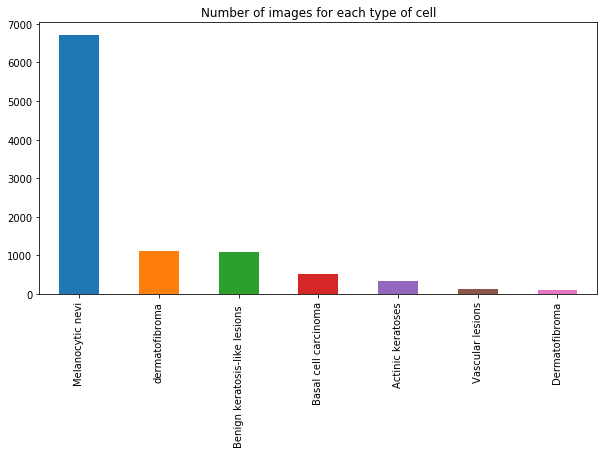

In [18]:
fig, ax1 = plt.subplots(1, 1, figsize = (10, 5))
ax1.set_title('Number of images for each type of cell')
df_metaInfo['cell_type'].value_counts().plot(kind='bar', ax=ax1)
print(df_metaInfo['cell_type'].value_counts())

- The dataset is very unblanced.  
- Most machine learning classification algorithms are sensitive to unbalance in the predictor classes.   
- An unbalanced dataset will bias the prediction model towards the more common class.

##### Distribution of population age

- The distribution of popiulation age is normally distributed.
- The normal distribution is useful because of the central limit theorem.

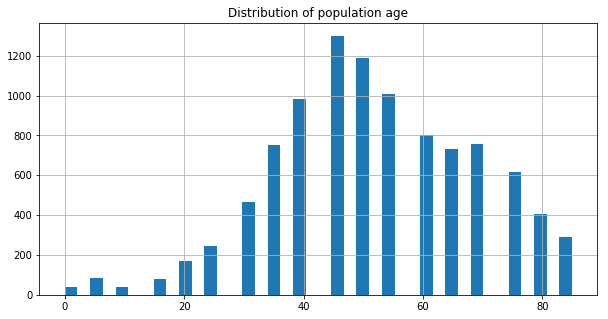

In [19]:
fig, ax1 = plt.subplots(1, 1, figsize = (10, 5))
ax1.set_title('Distribution of population age')
df_metaInfo['age'].hist(bins=40)

##### Number of images for each comfirmation

histo        5340
follow_up    3704
consensus     902
confocal       69
Name: dx_type, dtype: int64


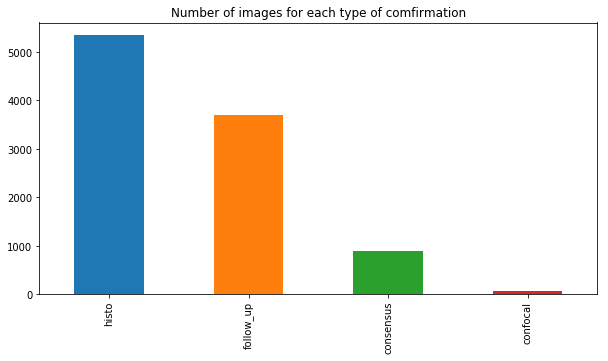

In [20]:
fig, ax1 = plt.subplots(1, 1, figsize = (10, 5))
ax1.set_title('Number of images for each type of comfirmation')
df_metaInfo['dx_type'].value_counts().plot(kind='bar', ax=ax1)
print(df_metaInfo['dx_type'].value_counts())

##### Number of images for each gender

male       5406
female     4552
unknown      57
Name: sex, dtype: int64


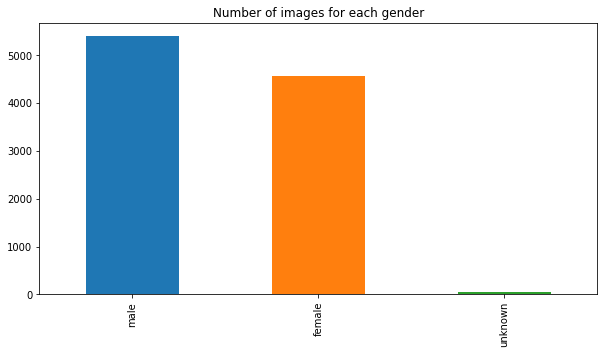

In [21]:
fig, ax1 = plt.subplots(1, 1, figsize = (10, 5))
ax1.set_title('Number of images for each gender')
df_metaInfo['sex'].value_counts().plot(kind='bar', ax=ax1)
print(df_metaInfo['sex'].value_counts())

##### Plot some examples for each types of images

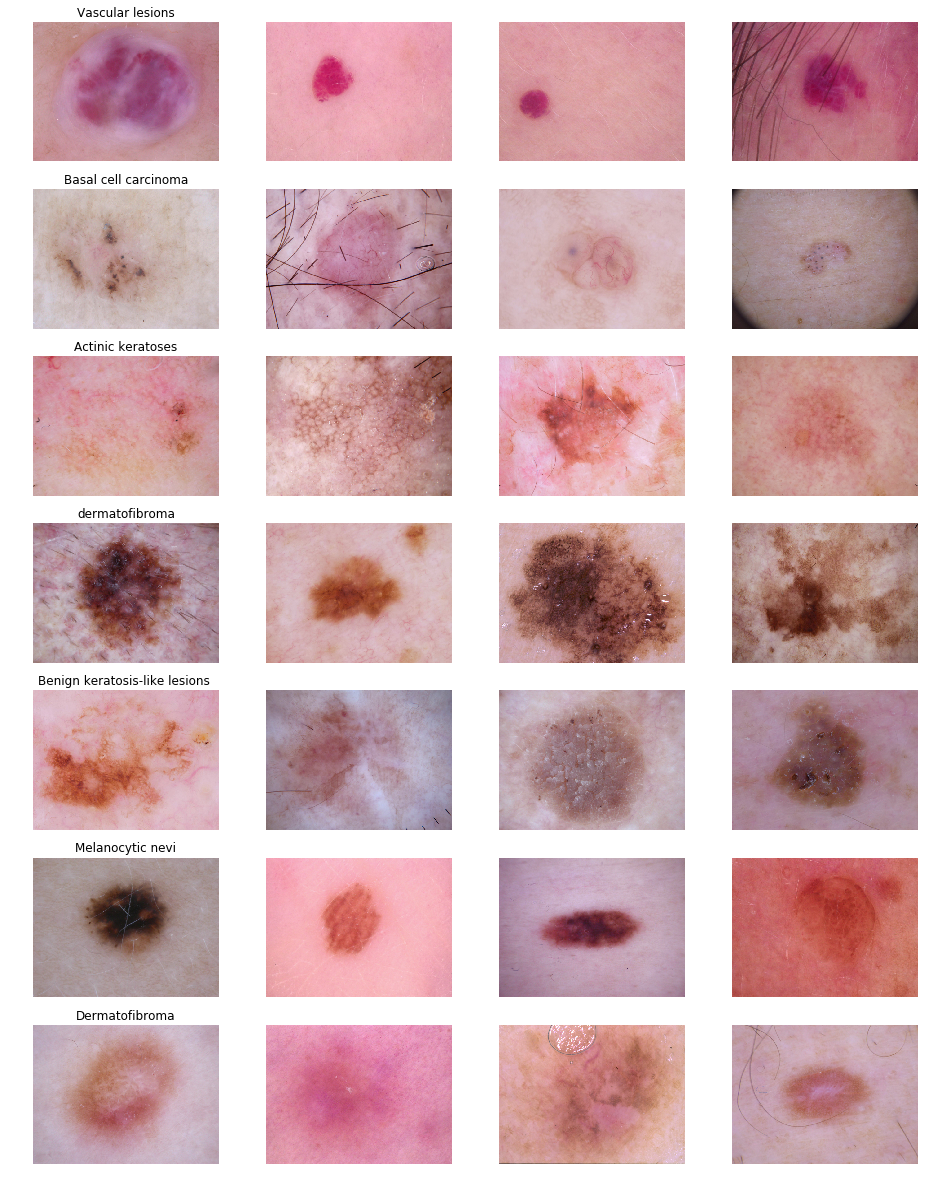

In [22]:
n_sample = 4
fig, m_ax = plt.subplots(7, n_sample, figsize = (16, 21))
# fig.suptitle('Multiple images', fontsize=20)
for i, (ax, type_name) in enumerate(zip(m_ax, set(df_metaInfo['cell_type']))):
    ax[0].set_title(type_name)
    random.seed(101)
    list_img = random.sample(list(df_metaInfo.loc[df_metaInfo['cell_type'] == type_name].path), n_sample)
    for j in range(n_sample):
        imgData = mpimg.imread(list_img[j])
        m_ax[i, j].imshow(imgData)
        m_ax[i, j].axis('off')

<a id='Part2_train_test_split'></a>
### 3. Train/Test split

- Train/test split by 10%  
- Data is very unbalance for each class, need to split data for **each class seperately**, so that the test data will contains all class of data.

In [23]:
df_img_akiec = df_metaInfo.loc[df_metaInfo['dx'] == 'akiec']
df_img_bcc = df_metaInfo.loc[df_metaInfo['dx'] == 'bcc']
df_img_bkl = df_metaInfo.loc[df_metaInfo['dx'] == 'bkl']
df_img_df = df_metaInfo.loc[df_metaInfo['dx'] == 'df']
df_img_mel = df_metaInfo.loc[df_metaInfo['dx'] == 'mel']
df_img_nv = df_metaInfo.loc[df_metaInfo['dx'] == 'nv']
df_img_vasc = df_metaInfo.loc[df_metaInfo['dx'] == 'vasc']

In [24]:
df_img_akiec = df_img_akiec.sample(int(len(df_img_akiec)/10), random_state=101)
df_img_bcc = df_img_bcc.sample(int(len(df_img_bcc)/10), random_state=102)
df_img_bkl = df_img_bkl.sample(int(len(df_img_bkl)/10), random_state=103)
df_img_df = df_img_df.sample(int(len(df_img_df)/10), random_state=104)
df_img_mel = df_img_mel.sample(int(len(df_img_mel)/10), random_state=105)
df_img_nv = df_img_nv.sample(int(len(df_img_nv)/10), random_state=106)
df_img_vasc = df_img_vasc.sample(int(len(df_img_vasc)/10), random_state=107)

##### Concatenation for all sameple test data as test datset, and the rest of them are for train dataset

In [25]:
df_test_csv = pd.concat([df_img_akiec,df_img_bcc,df_img_bkl,df_img_df,df_img_mel,df_img_nv,df_img_vasc]).reset_index(drop=True)
df_train_csv = df_metaInfo.loc[~df_metaInfo['image_id'].isin(df_test_csv['image_id'])].reset_index(drop=True)

##### Save train/test data information into 2 different csv files

In [26]:
# df_test_csv.to_csv(os.path.join(csvDataPath, 'test.csv'), index=False)
# df_train_csv.to_csv(os.path.join(csvDataPath, 'train.csv'), index=False)

[Back to Content](#Content)

<a id='Part3_Data_Augmentation'></a>
## Part 3 - Project Implementation - Data Augmentation

- To get more data, we just need to make minor alterations to our existing dataset.   
- Minor changes such as flips or translations or rotations. Our neural network would think these are distinct images anyway.

- **We have 10 types of augmentation. ** 
    1. simple flipping, 
    2. flipping, transpose, then add black border, 
    3. transpose and center crop, 
    4. roatation and center crop, 
    5. Gaussian blur or average blur, 
    6. Simple Translation and random flip, 
    7. random shear using Affine Transformation, 
    8. random shear using Perspective Transformation, 
    9. Gamma, 
    10. translation

**Click [Here](#Data_Augmentation_rep) for Result**

##### Set up some paramaters

In [33]:
rootDir=''
csvDataPath = os.path.join(rootDir, 'data_csv/')
imageDataPath = os.path.join(rootDir,'data_images/')
imageAugPath = os.path.join(imageDataPath,'HAM10000_images_part_3/')

### 1. Load data
Get data from csv file, only do data augmentation for train dataset

In [32]:
df_train = pd.read_csv(os.path.join(csvDataPath, 'train.csv'))

<a id='Part3_Data_Augmentation_each_tpye'></a>
### 2. Data Augmentation for each type

In [37]:
start_time = time.time()
aug_list = []
for i in range(len(df_train)):

    # get all information of each images
    lesion_id = df_train.loc[i].lesion_id
    image_id_ori = df_train.loc[i].image_id
    dx = df_train.loc[i].dx
    dx_type = df_train.loc[i].dx_type
    age = df_train.loc[i].age
    sex = df_train.loc[i].sex
    localization = df_train.loc[i].localization
    cell_type = df_train.loc[i].cell_type
    
    # read image from path
    img_data = cv2.imread(df_train.loc[i].path)
    
    # ===============================================================================================================
    # Different augmentation methods for different images, no need for 'nv' beacuse there is enough data for that
    # ===============================================================================================================
    # simple flipping
    if dx in ['bcc', 'akiec', 'vasc', 'df']:
        image_id = image_id_ori + '_1'
        path_new = os.path.join(imageAugPath, image_id+'.jpg')
        # flip with 0 or 1 dimensionality
        flipped_image = cv2.flip(img_data, random.randint(0, 1))
#         cv2.imwrite(path_new, flipped_image)
        aug_list.append([lesion_id, image_id, dx, dx_type, age, sex, localization, path_new, cell_type])
    
    # flipping, transpose, then add black border to get same ratio for h/w, then resize to 450*600
    if dx in ['bcc', 'akiec', 'vasc', 'df']:
        image_id = image_id_ori + '_2'
        path_new = os.path.join(imageAugPath, image_id+'.jpg')
        flipped_image = cv2.flip(img_data, random.randint(0, 1))
        transpose_image = cv2.transpose(flipped_image)
        border_image = cv2.copyMakeBorder(transpose_image,0,0,175,175,cv2.BORDER_CONSTANT,value=0)
        resized_image = cv2.resize(border_image, (600, 450))
#         cv2.imwrite(path_new, resized_image)
        aug_list.append([lesion_id, image_id, dx, dx_type, age, sex, localization, path_new, cell_type])
    
     # first transpose, add some black border and zoom in, then center crop the image
    if dx in ['mel', 'bkl', 'bcc', 'akiec', 'vasc', 'df']:
        image_id = image_id_ori + '_3'
        path_new = os.path.join(imageAugPath, image_id+'.jpg')
        (h, w) = img_data.shape[:2]
        trans_image = cv2.transpose(img_data)
        border_image = cv2.copyMakeBorder(trans_image,0,0,175,175,cv2.BORDER_CONSTANT,value=0)
        tmp_image = cv2.resize(border_image, (int(w*1.3), int(h*1.3)), interpolation = cv2.INTER_AREA)
        crop_image = tmp_image[int(int(h*0.3)/2):int(450+int(h*0.3)/2), int(int(w*0.3)/2):int(600+int(w*0.3)/2)]
#         cv2.imwrite(path_new, crop_image)
        aug_list.append([lesion_id, image_id, dx, dx_type, age, sex, localization, path_new, cell_type])
    
    # rotation with angles in (-180,180)
    if dx in ['mel', 'bkl', 'bcc', 'akiec', 'vasc', 'df']:
        image_id = image_id_ori + '_4'
        path_new = os.path.join(imageAugPath, image_id+'.jpg')
        (h, w) = img_data.shape[:2]
        center = (w / 2, h / 2)
        angles = np.random.uniform(-180, 180, 1)
        rotation_matrix = cv2.getRotationMatrix2D(center, angles, 1.0)
        rotated_image = cv2.warpAffine(img_data, rotation_matrix, (w, h))
#         cv2.imwrite(path_new, rotated_image)
        aug_list.append([lesion_id, image_id, dx, dx_type, age, sex, localization, path_new, cell_type])
    
    # first rotation and zoom in the image, then center crop the image
    if dx in ['mel', 'bkl', 'bcc', 'akiec', 'vasc', 'df']:
        image_id = image_id_ori + '_5'
        path_new = os.path.join(imageAugPath, image_id+'.jpg')
        (h, w) = img_data.shape[:2]
        center = (w / 2, h / 2)
        angles = np.random.uniform(-180, 180, 1)
        rotation_matrix = cv2.getRotationMatrix2D(center, angles, 1.0)
        rotated_image = cv2.warpAffine(img_data, rotation_matrix, (w, h))
        tmp_image = cv2.resize(rotated_image, (int(w*1.2), int(h*1.2)), interpolation = cv2.INTER_AREA)
        crop_image = tmp_image[int(int(h*0.2)/2):int(450+int(h*0.2)/2), int(int(w*0.2)/2):int(600+int(w*0.2)/2)]
#         cv2.imwrite(path_new, crop_image)
        aug_list.append([lesion_id, image_id, dx, dx_type, age, sex, localization, path_new, cell_type])

   # Gaussian blur or average blur
    if dx in ['bcc', 'akiec', 'vasc', 'df']:
        image_id = image_id_ori + '_6'
        path_new = os.path.join(imageAugPath, image_id+'.jpg')
        randomChoice = random.randint(0, 1)
        if randomChoice == 1:
            Blur_image = cv2.GaussianBlur(img_data,(5,5),0)
        else:
            Blur_image = cv2.blur(img_data,(5,5))
#         cv2.imwrite(path_new, Blur_image)
        aug_list.append([lesion_id, image_id, dx, dx_type, age, sex, localization, path_new, cell_type])

    # Simple Translation and random flip
    if dx in ['bcc', 'akiec', 'vasc', 'df']:
        image_id = image_id_ori + '_7'
        path_new = os.path.join(imageAugPath, image_id+'.jpg')
        (h, w) = img_data.shape[:2]
        pt = 100*np.random.uniform(low=0.3, high=0.7)
        shear_M = np.float32([[1,0,pt],[0,1,pt]])
        shear_image = cv2.warpAffine(img_data,shear_M,(w,h))
        if random.randint(0, 1) == 1:
            shear_image = cv2.flip(shear_image, random.randint(0, 1))
#         cv2.imwrite(path_new, shear_image)
        aug_list.append([lesion_id, image_id, dx, dx_type, age, sex, localization, path_new, cell_type])
    
    # random shear using Affine Transformation
    if dx in ['mel', 'bkl', 'bcc', 'akiec', 'vasc', 'df']:
        image_id = image_id_ori + '_8'
        path_new = os.path.join(imageAugPath, image_id+'.jpg')
        (h, w) = img_data.shape[:2]
        pt1 = 100*np.random.uniform(low=0.3, high=0.7)
        pt2 = 400*np.random.uniform(low=0.3, high=0.7)
        pts1 = np.float32([[pt1,pt1],[pt2,pt1],[pt1,pt2]])
        pts2 = np.float32([[pt1-30,pt1*2],[pt2,pt1],[pt1+10,pt1+pt2+10]])
        shear_M = cv2.getAffineTransform(pts1,pts2)
        shear_image = cv2.warpAffine(img_data,shear_M,(w,h))
#         cv2.imwrite(path_new, shear_image)
        aug_list.append([lesion_id, image_id, dx, dx_type, age, sex, localization, path_new, cell_type])
    
    # random shear using Perspective Transformation
    if dx in ['mel', 'bkl', 'bcc', 'akiec', 'vasc', 'df']:
        image_id = image_id_ori + '_9'
        path_new = os.path.join(imageAugPath, image_id+'.jpg')
        (h, w) = img_data.shape[:2]
        pt1 = 100*np.random.uniform(low=0.3, high=0.7)
        pt2 = 100*np.random.uniform(low=0.3, high=0.7)
        pt3 = 200+300*np.random.uniform(low=0.3, high=0.7)
        pt4 = 200+300*np.random.uniform(low=0.3, high=0.7)
        pts1 = np.float32([[pt1-20,pt2],[pt3,pt1],[pt2-10,(pt3+pt4)/2],[pt3,pt4]])
        pts2 = np.float32([[0,0],[250+pt1,0],[0,250+pt2],[250+pt1,250+pt2]])
        shear_M = cv2.getPerspectiveTransform(pts1,pts2)
        shear_image = cv2.warpPerspective(img_data,shear_M,(w,h))
#         cv2.imwrite(path_new, shear_image)
        aug_list.append([lesion_id, image_id, dx, dx_type, age, sex, localization, path_new, cell_type])

    # Use gamma correction to optimize the contrast and brightness
    if dx in ['bcc', 'akiec', 'vasc', 'df']:
        image_id = image_id_ori + '_10'
        path_new = os.path.join(imageAugPath, image_id+'.jpg')
        # build a lookup table mapping the pixel values [0, 255] to their adjusted gamma values
        # apply gamma correction using the lookup table
        invGamma = np.random.uniform(low=0.5, high=1.5)
        table = np.array([((i / 255.0) ** invGamma) * 255 for i in np.arange(0, 256)]).astype("uint8")
        gamma_image = cv2.LUT(img_data, table)
#         cv2.imwrite(path_new, gamma_image)
        aug_list.append([lesion_id, image_id, dx, dx_type, age, sex, localization, path_new, cell_type])
    
    # ===============================================================================================================
    # repreat some methods for more augmentation for last 2/3 class
    # ===============================================================================================================     
    # rotation again with angles in (-180,180)
    if dx in ['bcc', 'akiec', 'vasc', 'df']:
        image_id = image_id_ori + '_11'
        path_new = os.path.join(imageAugPath, image_id+'.jpg')
        (h, w) = img_data.shape[:2]
        center = (w / 2, h / 2)
        angles = np.random.uniform(-180, 180, 1)
        rotation_matrix = cv2.getRotationMatrix2D(center, angles, 1.0)
        rotated_image = cv2.warpAffine(img_data, rotation_matrix, (w, h))
#         cv2.imwrite(path_new, rotated_image)
        aug_list.append([lesion_id, image_id, dx, dx_type, age, sex, localization, path_new, cell_type])
    
    # first rotation and zoom in the image, then center crop the image
    if dx in ['vasc', 'df']:
        image_id = image_id_ori + '_12'
        path_new = os.path.join(imageAugPath, image_id+'.jpg')
        (h, w) = img_data.shape[:2]
        center = (w / 2, h / 2)
        angles = np.random.uniform(-180, 180, 1)
        rotation_matrix = cv2.getRotationMatrix2D(center, angles, 1.0)
        rotated_image = cv2.warpAffine(img_data, rotation_matrix, (w, h))
        tmp_image = cv2.resize(rotated_image, (int(w*1.2), int(h*1.2)), interpolation = cv2.INTER_AREA)
        crop_image = tmp_image[int(int(h*0.2)/2):int(450+int(h*0.2)/2), int(int(w*0.2)/2):int(600+int(w*0.2)/2)]
#         cv2.imwrite(path_new, crop_image)
        aug_list.append([lesion_id, image_id, dx, dx_type, age, sex, localization, path_new, cell_type])
        
end_time = time.time()
time_dif = end_time - start_time
total_time = "Time usage: " + str(timedelta(seconds=int(round(time_dif))))
total_time

##### Creat augmentation csv file and concat with original train csv file, then save the new train meta csv file

In [36]:
df_train_aug = pd.DataFrame(aug_list, columns=list(df_train.columns))
df_train_aug_csv = pd.concat([df_train,df_train_aug]).reset_index(drop=True)

In [35]:
# df_train_aug_csv.to_csv(os.path.join(csvDataPath, 'train_aug.csv'), index=False)

<a id='Part3_Data_virtualization'> </a>
### 3. Plot some examples for each types of augmented images

##### Here are the list of all augmentation methods that applied to different type of images

In [39]:
df_train_aug_csv = pd.read_csv(os.path.join(csvDataPath, 'train_aug.csv'))

In [38]:
aug_methods_list_1 = ['TransCrop', 'Rotation', 'RotationCrop', 'AffineTransfor', 'PerspectiveTransfor']
aug_methods_list_2 = ['Flip', 'FlipTransBorder', 'TransCrop', 'Rotation', 'RotationCrop', 
                    'Blur', 'Translation', 'AffineTransfor', 'PerspectiveTransfor', 'Gamma']

##### Random select one image from ['mel' 'bkl'] and plot augmentation examples

In [43]:
img_mel = random.sample(list(df_train.loc[df_train['dx'] == 'mel'].image_id), 1)[0]
mel_list = []
mel_list.append(list(df_train_aug_csv.loc[df_train_aug_csv['image_id'] == (img_mel+'_3')].path)[0])
mel_list.append(list(df_train_aug_csv.loc[df_train_aug_csv['image_id'] == (img_mel+'_4')].path)[0])
mel_list.append(list(df_train_aug_csv.loc[df_train_aug_csv['image_id'] == (img_mel+'_5')].path)[0])
mel_list.append(list(df_train_aug_csv.loc[df_train_aug_csv['image_id'] == (img_mel+'_8')].path)[0])
mel_list.append(list(df_train_aug_csv.loc[df_train_aug_csv['image_id'] == (img_mel+'_9')].path)[0])

img_bkl = random.sample(list(df_train.loc[df_train['dx'] == 'bkl'].image_id), 1)[0]
bkl_list = []
bkl_list.append(list(df_train_aug_csv.loc[df_train_aug_csv['image_id'] == (img_bkl+'_3')].path)[0])
bkl_list.append(list(df_train_aug_csv.loc[df_train_aug_csv['image_id'] == (img_bkl+'_4')].path)[0])
bkl_list.append(list(df_train_aug_csv.loc[df_train_aug_csv['image_id'] == (img_bkl+'_5')].path)[0])
bkl_list.append(list(df_train_aug_csv.loc[df_train_aug_csv['image_id'] == (img_bkl+'_8')].path)[0])
bkl_list.append(list(df_train_aug_csv.loc[df_train_aug_csv['image_id'] == (img_bkl+'_9')].path)[0])

img_sample = []
img_sample.append(mel_list)
img_sample.append(bkl_list)

<a id='Data_Augmentation_rep'></a>

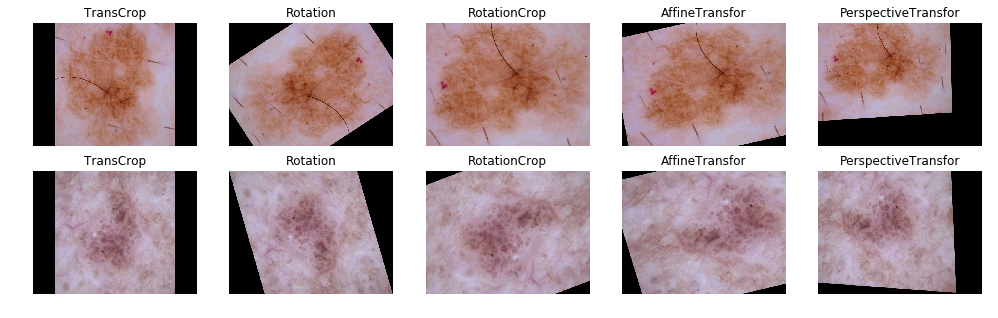

In [44]:
fig, m_ax = plt.subplots(2, 5, figsize = (17, 5))
for i in range(2):
    for j in range(5):
        imgData = mpimg.imread(img_sample[i][j])
        m_ax[i, j].set_title(aug_methods_list_1[j])
        m_ax[i, j].imshow(imgData)
        m_ax[i, j].axis('off')

##### Random select one image from ['bcc' 'akiec' 'vasc' 'df'] and plot augmentation examples

In [45]:
img_bcc = random.sample(list(df_train.loc[df_train['dx'] == 'bcc'].image_id), 1)[0]
bcc_list = []
bcc_list.append(list(df_train_aug_csv.loc[df_train_aug_csv['image_id'] == (img_bcc+'_1')].path)[0])
bcc_list.append(list(df_train_aug_csv.loc[df_train_aug_csv['image_id'] == (img_bcc+'_2')].path)[0])
bcc_list.append(list(df_train_aug_csv.loc[df_train_aug_csv['image_id'] == (img_bcc+'_3')].path)[0])
bcc_list.append(list(df_train_aug_csv.loc[df_train_aug_csv['image_id'] == (img_bcc+'_4')].path)[0])
bcc_list.append(list(df_train_aug_csv.loc[df_train_aug_csv['image_id'] == (img_bcc+'_5')].path)[0])
bcc_list.append(list(df_train_aug_csv.loc[df_train_aug_csv['image_id'] == (img_bcc+'_6')].path)[0])
bcc_list.append(list(df_train_aug_csv.loc[df_train_aug_csv['image_id'] == (img_bcc+'_7')].path)[0])
bcc_list.append(list(df_train_aug_csv.loc[df_train_aug_csv['image_id'] == (img_bcc+'_8')].path)[0])
bcc_list.append(list(df_train_aug_csv.loc[df_train_aug_csv['image_id'] == (img_bcc+'_9')].path)[0])
bcc_list.append(list(df_train_aug_csv.loc[df_train_aug_csv['image_id'] == (img_bcc+'_10')].path)[0])

img_akiec = random.sample(list(df_train.loc[df_train['dx'] == 'akiec'].image_id), 1)[0]
akiec_list = []
akiec_list.append(list(df_train_aug_csv.loc[df_train_aug_csv['image_id'] == (img_akiec+'_1')].path)[0])
akiec_list.append(list(df_train_aug_csv.loc[df_train_aug_csv['image_id'] == (img_akiec+'_2')].path)[0])
akiec_list.append(list(df_train_aug_csv.loc[df_train_aug_csv['image_id'] == (img_akiec+'_3')].path)[0])
akiec_list.append(list(df_train_aug_csv.loc[df_train_aug_csv['image_id'] == (img_akiec+'_4')].path)[0])
akiec_list.append(list(df_train_aug_csv.loc[df_train_aug_csv['image_id'] == (img_akiec+'_5')].path)[0])
akiec_list.append(list(df_train_aug_csv.loc[df_train_aug_csv['image_id'] == (img_akiec+'_6')].path)[0])
akiec_list.append(list(df_train_aug_csv.loc[df_train_aug_csv['image_id'] == (img_akiec+'_7')].path)[0])
akiec_list.append(list(df_train_aug_csv.loc[df_train_aug_csv['image_id'] == (img_akiec+'_8')].path)[0])
akiec_list.append(list(df_train_aug_csv.loc[df_train_aug_csv['image_id'] == (img_akiec+'_9')].path)[0])
akiec_list.append(list(df_train_aug_csv.loc[df_train_aug_csv['image_id'] == (img_akiec+'_10')].path)[0])

img_vasc = random.sample(list(df_train.loc[df_train['dx'] == 'vasc'].image_id), 1)[0]
vasc_list = []
vasc_list.append(list(df_train_aug_csv.loc[df_train_aug_csv['image_id'] == (img_vasc+'_1')].path)[0])
vasc_list.append(list(df_train_aug_csv.loc[df_train_aug_csv['image_id'] == (img_vasc+'_2')].path)[0])
vasc_list.append(list(df_train_aug_csv.loc[df_train_aug_csv['image_id'] == (img_vasc+'_3')].path)[0])
vasc_list.append(list(df_train_aug_csv.loc[df_train_aug_csv['image_id'] == (img_vasc+'_4')].path)[0])
vasc_list.append(list(df_train_aug_csv.loc[df_train_aug_csv['image_id'] == (img_vasc+'_5')].path)[0])
vasc_list.append(list(df_train_aug_csv.loc[df_train_aug_csv['image_id'] == (img_vasc+'_6')].path)[0])
vasc_list.append(list(df_train_aug_csv.loc[df_train_aug_csv['image_id'] == (img_vasc+'_7')].path)[0])
vasc_list.append(list(df_train_aug_csv.loc[df_train_aug_csv['image_id'] == (img_vasc+'_8')].path)[0])
vasc_list.append(list(df_train_aug_csv.loc[df_train_aug_csv['image_id'] == (img_vasc+'_9')].path)[0])
vasc_list.append(list(df_train_aug_csv.loc[df_train_aug_csv['image_id'] == (img_vasc+'_10')].path)[0])

img_df = random.sample(list(df_train.loc[df_train['dx'] == 'df'].image_id), 1)[0]
df_list = []
df_list.append(list(df_train_aug_csv.loc[df_train_aug_csv['image_id'] == (img_df+'_1')].path)[0])
df_list.append(list(df_train_aug_csv.loc[df_train_aug_csv['image_id'] == (img_df+'_2')].path)[0])
df_list.append(list(df_train_aug_csv.loc[df_train_aug_csv['image_id'] == (img_df+'_3')].path)[0])
df_list.append(list(df_train_aug_csv.loc[df_train_aug_csv['image_id'] == (img_df+'_4')].path)[0])
df_list.append(list(df_train_aug_csv.loc[df_train_aug_csv['image_id'] == (img_df+'_5')].path)[0])
df_list.append(list(df_train_aug_csv.loc[df_train_aug_csv['image_id'] == (img_df+'_6')].path)[0])
df_list.append(list(df_train_aug_csv.loc[df_train_aug_csv['image_id'] == (img_df+'_7')].path)[0])
df_list.append(list(df_train_aug_csv.loc[df_train_aug_csv['image_id'] == (img_df+'_8')].path)[0])
df_list.append(list(df_train_aug_csv.loc[df_train_aug_csv['image_id'] == (img_df+'_9')].path)[0])
df_list.append(list(df_train_aug_csv.loc[df_train_aug_csv['image_id'] == (img_df+'_10')].path)[0])

img_sample = []
img_sample.append(bcc_list)
img_sample.append(akiec_list)
img_sample.append(vasc_list)
img_sample.append(df_list)

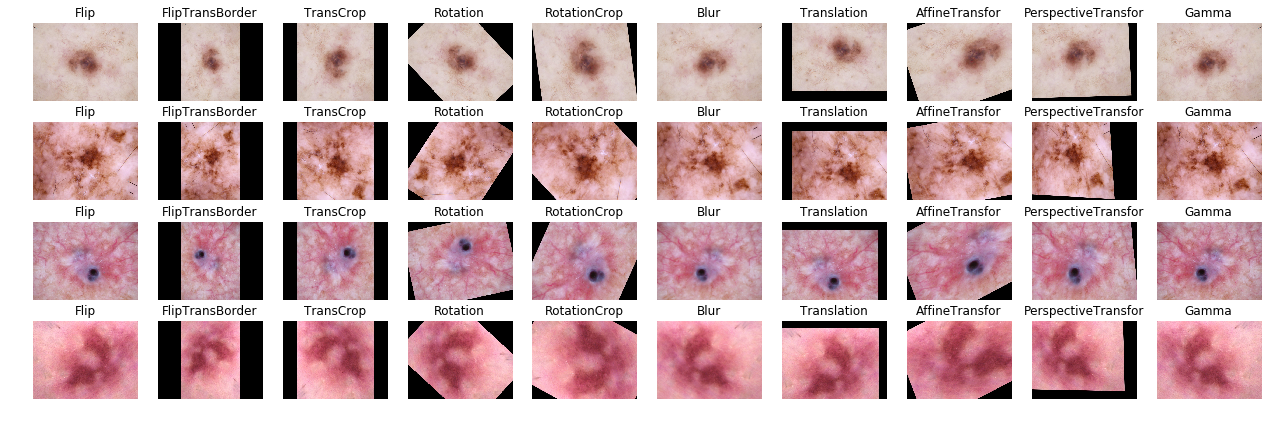

In [46]:
fig, m_ax = plt.subplots(4, 10, figsize = (22, 7))
for i in range(4):
    for j in range(10):
        imgData = mpimg.imread(img_sample[i][j])
        m_ax[i, j].set_title(aug_methods_list_2[j])
        m_ax[i, j].imshow(imgData)
        m_ax[i, j].axis('off')

### 4. Data Distribution after augmentation
##### Number of images for each type of cell

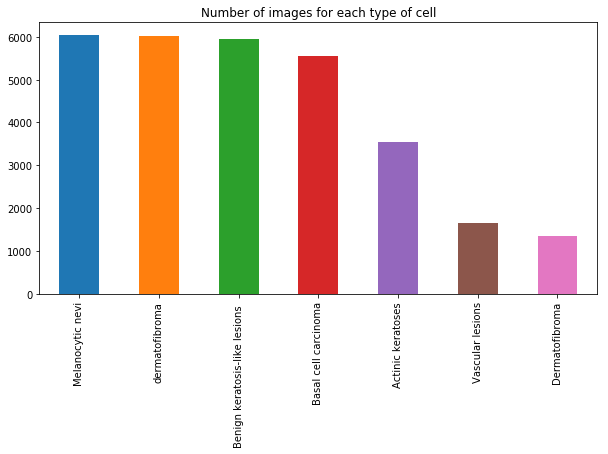

In [47]:
fig, ax1 = plt.subplots(1, 1, figsize = (10, 5))
ax1.set_title('Number of images for each type of cell')
df_train_aug_csv['cell_type'].value_counts().plot(kind='bar', ax=ax1)

##### Distribution of population age

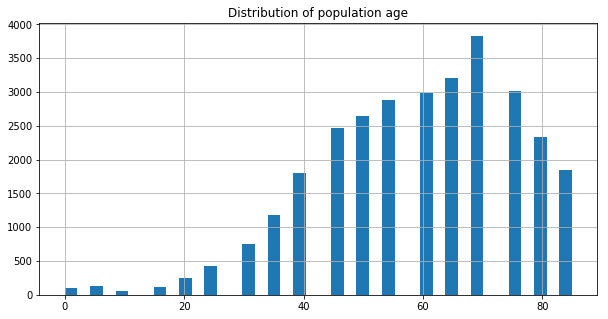

In [49]:
fig, ax1 = plt.subplots(1, 1, figsize = (10, 5))
ax1.set_title('Distribution of population age')
df_train_aug_csv['age'].hist(bins=40)

##### New data sample

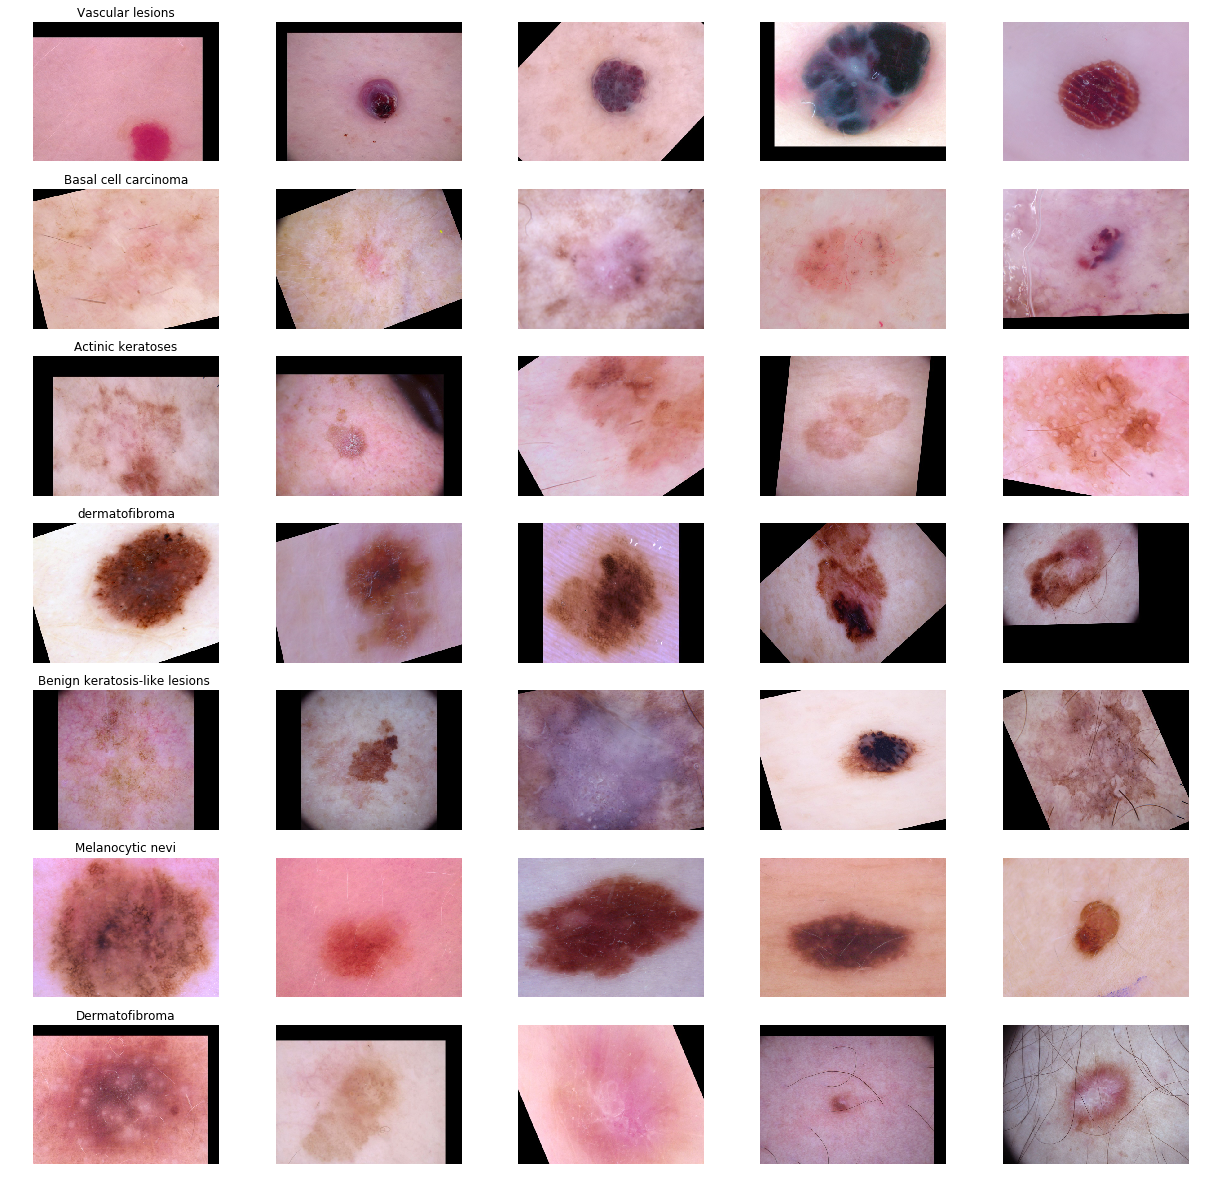

In [50]:
# Plot some examples for each types of images
n_sample = 5
fig, m_ax = plt.subplots(7, n_sample, figsize = (21, 21))
# fig.suptitle('Multiple images', fontsize=20)
for i, (ax, type_name) in enumerate(zip(m_ax, set(df_train_aug_csv['cell_type']))):
    ax[0].set_title(type_name)
    random.seed(101)
    list_img = random.sample(list(df_train_aug_csv.loc[df_train_aug_csv['cell_type'] == type_name].path), n_sample)
    for j in range(n_sample):
        imgData = mpimg.imread(list_img[j])
        m_ax[i, j].imshow(imgData)
        m_ax[i, j].axis('off')

[Back to Content](#Content)

<a id='Part4_VGG19'></a>
## Part 4 - Project Implementation - Transfer Learning using VGG19

CNN Transfer Learning Using VGG19  
This module demonstrates the entire training part using VGG19 structure, and the pretrained weights as a strat point for new training.  

- **Augmented Data Input**
    - AugFlag is 0: no change for image input
    - AugFlag is (1-5): make change for image input

- **VGG19 Structure**
    - Customized output layer - 7 class

- **Pretrained weigh loading**
    - ImageNet pretrained weight and bias
    - Good start point

- **Three stage Training stratage**
    - train only the last fc layer (this layer's weight is initialized) to get good start point
    - train the entire sturcture with learning rate of 1e-5
    - train the entire sturcture with less learning rate of 1e-6

- **Loss stratage**
    - First loss wiil be Cross entropy loss between predict logits and real labels.
    - First loss wiil be Cross entropy loss plus l2 regulizer.
        - Regularization is a very important technique in machine learning to prevent overfitting. 
        - Mathematically speaking, it adds a regularization term in order to prevent the coefficients to fit so perfectly to overfit. 
        - The difference between the L1 and L2 is just that L2 is the sum of the square of the weights, while L1 is just the sum of the weights.
        - L2 amounts to adding a penalty on the norm of the weights to the loss. 
        - In TensorFlow, you can compute the L2 loss for a tensor t using nn.l2_loss(t). 
        - The right amount of regularization should improve your validation / test accuracy.

**Script:**  
check python script for more details:
- __[vgg19_3stage.py](vgg19_3stage.py)__

**Output:**  
- System out put is saved in '/nohup.out'  
- Performance Report is saved in '/report/'  
- Well trained model is saved in '/saved_model/model_name/'    
- TensorBoard (if have) is saved in '/tf_board/'    
  
   
#### Click __[Here](report/VGG19_Dec3_W5yNfZu.log)__ For Report.

#### Click [Here](#VGG19_1_result) For Result

<a id='Part4_Training_preparation'></a>
### 1. Training preparation

##### Set up some paramaters

In [3]:
notebookname = 'VGG19_with_pertrained_weight_3stages'

# Generate 7 random char as instance running id
run_id = random.sample('0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ', 7)
run_id = "".join(x for x in run_id)
# attampt_name is the name of the model
attampt_name = 'VGG19_Dec3_' + run_id

# Path and Dir configration
rootDir=''
csvDataPath = os.path.join(rootDir, 'data_csv/')
imageDataPath = os.path.join(rootDir,'data_images/')
checkpoint_file = os.path.join(rootDir,'vgg_19.ckpt')
tfBoardDir = os.path.join(rootDir,'tf_board', attampt_name)

# Paramaters for model
BATCH_SIZE = 20
IMG_WIDTH = 224
IMG_HEIGHT = 224
NUM_CLASS = 7
lesion_type_list = ['nv', 'mel', 'bkl', 'bcc', 'akiec', 'vasc', 'df']

##### Load csv data

In [4]:
df_train_ori = pd.read_csv(os.path.join(csvDataPath, 'train.csv'))
df_train_all = pd.read_csv(os.path.join(csvDataPath, 'train_aug.csv'))
df_test_all = pd.read_csv(os.path.join(csvDataPath, 'test.csv'))

# The number of last 3 types of images is still less (even after data augmentation), 
# replicate last 3 types of images to make training dataset more balanced
df_lastTwo = df_train_ori.loc[df_train_ori['dx'].isin(['df', 'vasc'])].reset_index(drop=True)
df_lastThree = df_train_ori.loc[df_train_ori['dx'].isin(['akiec'])].reset_index(drop=True)
df_train_all = df_train_all.append([df_lastTwo]*16, ignore_index=True)
df_train_all = df_train_all.append([df_lastThree]*4, ignore_index=True)

##### Helper functions for input data

In [5]:
def get_Labels(labels):
    """
    ARG:
        labels: list of actual label for a batch input
    RETURN:
        labelList: list of one-hot encoding labels
    """
    labelList = np.zeros((len(labels),7))
    for i in range(len(labels)):
        labIdx = lesion_type_list.index(labels[i])
        labelList[i][labIdx] = 1
    return labelList

def get_augFlag(ifTrain, csv_data):
    """
    ARG:
        ifTrain: True or False for if doing training process
        csv_data: the dataframe for the batch input
    RETURN:
        augFlag_list: list of int number in (0,5)
    DESCRIPTION:
        For train process make image augmentation for original image, 
        for test process, return 0 for no image change
    """
    csv_data = csv_data.reset_index(drop=True)
    augFlag_list = []
    if ifTrain:
        for i in range(len(csv_data)):
            if csv_data.loc[i].image_id[-2] == '_' or csv_data.loc[i].image_id[-3] == '_':
                augFlag_list.append(0)
            else:
                augFlag_list.append(random.randint(a=0, b=5))
        augFlag_list = np.array(augFlag_list)
    else: 
        augFlag_list = np.zeros(len(csv_data))
    return augFlag_list

# Get Next Batch
def next_batch(indx1, indx2, csv_data, ifTrain):
    """
    ARG:
        indx1: start index for batch
        indx2: end index for batch
        csv_data: the dataframe of the all image information
        ifTrain: True or False for if doing training process
    RETURN:
        imgPaths: list of path for batch images
        imgLabels: list of labels for batch images
        augFlags: list of augFlag for batch images
    DESCRIPTION:
        Get all information for one batch
    """
    imgPaths = np.array(csv_data.path[indx1:indx2])
    imgLabels = get_Labels(list(csv_data.dx[indx1:indx2]))
    augFlags = get_augFlag(ifTrain, csv_data[indx1:indx2])
    return imgPaths, imgLabels, augFlags


<a id='Part4_Create_structure'></a>
### 2. Create model based on vgg19 structure

##### create input tensor for model

In [62]:
tf.reset_default_graph()

x_in = tf.placeholder(tf.string, shape=(None,), name='img_paths')
Aug_flag = tf.placeholder(tf.int32, shape=(None,), name='aug_flags')
isTrain = tf.placeholder(tf.bool, name='is_training')
# actual placeholder
y_label = tf.placeholder(tf.int32, shape=(None, NUM_CLASS), name='labels')


def f0(image_in): return image_in
def f1(image_in): 
    # random flip left right
    image_result = tf.image.random_flip_left_right(image_in)
    if random.randint(0,1) == 1:
        image_result = tf.image.transpose_image(image_result)
    return image_result
def f2(image_in): 
    # random flip up down
    image_result = tf.image.random_flip_up_down(image_in)
    if random.randint(a=0, b=1) == 1:
        image_result = tf.image.transpose_image(image_result)
    return image_result
def f3(image_in): 
    # random rotate within angle [-180, 180]
    angles = np.random.uniform(-180, 180, 1)
    image_result = tf.contrib.image.rotate(image_in,angles=angles,interpolation='NEAREST')
    return image_result
def f4(image_in): 
    # scale and random crop
    temp_img = tf.image.resize_images(image_in, [256, 256])
    image_result = tf.random_crop(temp_img, [IMG_HEIGHT, IMG_WIDTH, 3])
#     image_result = tf.image.central_crop(temp_img, (224/280))
    return image_result
def f5(image_in): 
    # random shear within range [-0.2,0.2]
    shear_angle = np.deg2rad(np.random.uniform(-0.2, 0.2))
    shear_matrix = np.array([1, -np.sin(shear_angle), 0, 0, np.cos(shear_angle), 0, 0, 0])
    image_result = tf.contrib.image.transform(image_in,shear_matrix,interpolation='NEAREST')
    return image_result

def load_image(input_elems):
    """
    ARG:
        input_elems: one image path and its augFlag
    RETURN:
        image_result: the real image that is going to be passed into madel
    DESCRIPTION:
        f0: make no change
        f1: random flip left right and random transpose
        f2: random flip up down and random transpose
        f3: random rotate within angle [-180, 180]
        f4: scale and random crop
        f5: random shear within range [-0.2,0.2]
    """
    
    image_file = input_elems[0]
    augFlag = input_elems[1]
    
    image = tf.read_file(image_file)
    image = tf.image.decode_jpeg(image, channels=3)
    input_image = tf.cast(image, tf.float32)
    # resizing to 224 x 224 x 3
    image_resized = tf.image.resize_images(input_image, [IMG_HEIGHT, IMG_WIDTH], align_corners=True, 
                                           method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
    # Data Augmentation
    image_result = tf.case({tf.equal(augFlag, 0): lambda: f0(image_resized), 
                            tf.equal(augFlag, 1): lambda: f1(image_resized), 
                            tf.equal(augFlag, 2): lambda: f2(image_resized), 
                            tf.equal(augFlag, 3): lambda: f3(image_resized), 
                            tf.equal(augFlag, 4): lambda: f4(image_resized), 
                            tf.equal(augFlag, 5): lambda: f5(image_resized)},
                           default=lambda: f0(image_resized), 
                           exclusive=True)
    return image_result

elems = (x_in, Aug_flag)
train_dataset = tf.map_fn(load_image, elems, dtype=(tf.float32))
image_inputs = tf.identity(train_dataset, name='new_inputs')

##### Load vgg19 model using tf.slim

In [63]:
# load model
vgg_model = nets.vgg
with slim.arg_scope(vgg_model.vgg_arg_scope()):
    old_pred,_ = vgg_model.vgg_19(inputs=image_inputs, num_classes=7, is_training=isTrain, spatial_squeeze=True)

# restore some weights for stage one training
exclude_variables = ['vgg_19/fc8']
variables_to_restore = slim.get_variables_to_restore(exclude=exclude_variables)
saver_ckpt = tf.train.Saver(variables_to_restore)

##### Output layers

In [64]:
# output layer
vgg_19_fc8_last = tf.get_default_graph().get_tensor_by_name('vgg_19/fc8/squeezed:0')
with tf.variable_scope('prediction'):
    y_pred_softmax = tf.nn.softmax(vgg_19_fc8_last, name='pred_softmax')
    y_pred_cls = tf.argmax(y_pred_softmax, axis=1, name='pred_class')

# Performance Measures 
y_label_cls = tf.cast(tf.argmax(y_label, axis=1), tf.int32, name='y_label_cls')
correct_prediction = tf.equal(tf.cast(y_pred_cls, tf.int32), y_label_cls)
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32), name='batch_accuracy')

##### Variables to train in different stages (change when fine tuning)

In [65]:
variables_to_first_train = list(set(slim.get_variables_to_restore()) - set(variables_to_restore))
variables_new_layer = [var for var in tf.global_variables() if 'prediction' in var.name]
variables_to_train_all = list(variables_to_restore + variables_to_first_train + variables_new_layer)

##### Tensor Board (if need)

In [66]:
with tf.variable_scope('TensorBoard'):
    graph_writer = tf.summary.FileWriter(tfBoardDir)

    tfb_loss = tf.placeholder(tf.float32, shape=(), name='tfb_loss')
    tfb_accuracy = tf.placeholder(tf.float32, shape=(), name='tfb_accuracy')

    tf.summary.scalar('tfb_loss', tfb_loss)
    tf.summary.scalar('tfb_accuracy', tfb_accuracy)
    merged = tf.summary.merge_all()

##### Loss Function and Training Optimization

In [ ]:
# L2 regularizer
weights_list_all = [var for var in variables_to_train_all if 'weights' in var.name]
# weights_list_all = [var for var in tf.global_variables() if 'weights' in var.name]
l2_loss_list_all = [tf.nn.l2_loss(var) for var in weights_list_all]
regularizers = sum(l2_loss_list_all)

# Cost-function
#tf.losses.sparse_softmax_cross_entropy(logits=predictions, labels=y_actual)
#cross_entropy = tf.losses.get_total_loss()
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits=vgg_19_fc8_last, labels=y_label)
loss_1 = tf.reduce_mean(cross_entropy, name='loss_1')
loss_2 = tf.reduce_mean(cross_entropy + 0.00001 * regularizers, name='loss_2')

# Optimization method
myOptimizer_1 = tf.train.MomentumOptimizer(learning_rate=1e-4, momentum=0.9)
myOptimizer_2 = tf.train.MomentumOptimizer(learning_rate=1e-5, momentum=0.9)
myOptimizer_3 = tf.train.MomentumOptimizer(learning_rate=1e-6, momentum=0.9)
train_op_1 = myOptimizer_1.minimize(loss_1, var_list=variables_to_first_train, name='train_op_1')
train_op_2 = myOptimizer_2.minimize(loss_2, var_list=variables_to_train_all, name='train_op_2')
train_op_3 = myOptimizer_3.minimize(loss_2, var_list=variables_to_train_all, name='train_op_3')

<a id='Part4_Start_Session'></a>
### 3. Start a Session for training

In [68]:
# Session creation and variables initialization
sess = tf.Session()
logits_initializers = [var.initializer for var in tf.global_variables() if 'vgg_19/fc8' in var.name]
sess.run(logits_initializers)
momentum_initializers = [var.initializer for var in tf.global_variables() if 'Momentum' in var.name]
sess.run(momentum_initializers)
saver_ckpt.restore(sess, checkpoint_file)

##### Helper functions for model performance on train dataset

In [69]:
# Get training data accuracy and loss
def train_result():
    """
    RETURN:
        loss_over_all: the loss_1 for entire train data in model prediction
        acc: the accuracy for entire train data in model prediction
        cm: the confusion matrix for entire train data in model prediction
    """
    num_train = len(df_train_all)
    train_label_cls = np.zeros(shape=num_train, dtype=np.int)
    train_pred_cls = np.zeros(shape=num_train, dtype=np.int)
    train_pred_prob = np.zeros(shape=[num_train,7])
    
    idx = 0
    num_of_steps = 0
    loss_value_all = 0.00
    train_accuracy_all = 0.00
    
    while idx < num_train:
        kidx = min(idx + BATCH_SIZE, num_train)
        x_batch, y_true_batch, augFlags = next_batch(idx, kidx, df_train_all, False)
        
        loss_batch = sess.run(loss_1, feed_dict = {x_in:x_batch, y_label:y_true_batch, isTrain:False, Aug_flag:augFlags})
        acc_batch = sess.run(accuracy, feed_dict = {x_in:x_batch, y_label:y_true_batch, isTrain:False, Aug_flag:augFlags})
        
        train_label_cls[idx:kidx] = sess.run(y_label_cls, feed_dict={y_label:y_true_batch})
        train_pred_cls[idx:kidx] = sess.run(y_pred_cls, feed_dict={x_in:x_batch, isTrain:False, Aug_flag:augFlags})
        train_pred_prob[idx:kidx] = sess.run(y_pred_softmax, feed_dict={x_in:x_batch, isTrain:False, Aug_flag:augFlags})
        
        loss_value_all += loss_batch
        train_accuracy_all += acc_batch
        idx = kidx
        num_of_steps += 1
        
    loss_over_all = loss_value_all/num_of_steps
    acc = train_accuracy_all/num_of_steps
    cm = metrics.confusion_matrix(y_true=train_label_cls, y_pred=train_pred_cls)
    
    return loss_over_all, acc, cm

##### Helper functions for model performance on test dataset

In [70]:
# Test the model, Showing the performance
def print_test_result():
    """
    RETURN:
        loss_over_all: the loss_1 for entire test data in model prediction
        acc: the accuracy for entire test data in model prediction
        cm: the confusion matrix for entire test data in model prediction
    """
    num_test = len(df_test_all)
    test_label_cls = np.zeros(shape=num_test, dtype=np.int)
    test_pred_cls = np.zeros(shape=num_test, dtype=np.int)
    test_pred_prob = np.zeros(shape=[num_test,7])
    
    idx = 0
    num_of_steps = 0
    loss_value_all = 0.00
    
    while idx < num_test:
        
        kidx = min(idx + BATCH_SIZE, num_test)
        x_batch, y_true_batch, augFlags = next_batch(idx, kidx, df_test_all, False)
        
        loss_batch = sess.run(loss_1, feed_dict = {x_in:x_batch, y_label:y_true_batch, isTrain:False, Aug_flag:augFlags})
        acc_batch = sess.run(accuracy, feed_dict = {x_in:x_batch, y_label:y_true_batch, isTrain:False, Aug_flag:augFlags})
        
        test_label_cls[idx:kidx] = sess.run(y_label_cls, feed_dict={y_label:y_true_batch})
        test_pred_cls[idx:kidx] = sess.run(y_pred_cls, feed_dict={x_in:x_batch, isTrain:False, Aug_flag:augFlags})
        test_pred_prob[idx:kidx] = sess.run(y_pred_softmax, feed_dict={x_in:x_batch, isTrain:False, Aug_flag:augFlags})
        
        loss_value_all += loss_batch
        idx = kidx
        num_of_steps += 1
        
    loss_over_all = loss_value_all/num_of_steps
    correct = (test_label_cls == np.array(test_pred_cls))
    correct_sum = np.array(correct).sum()
    acc = float(correct_sum) / num_test

    cm = metrics.confusion_matrix(y_true=test_label_cls, y_pred=test_pred_cls)
    
    # Print the accuracy.
    msg = "Accuracy on Test-Set: {0:.1%} ({1} / {2}),  loss: {3:>5.5}"
    msg_format = msg.format(acc, correct_sum, num_test, loss_over_all)
    message_all = msg_format + '\n' + str(cm)
    
    print_to_write(attampt_name, message_all, 'a')
    print(message_all)
    print('-------------------------------------------------------------------------')

##### Helper functions for saving model

In [71]:
# model saver  
def save_model(version):
    """
    ARG:
        version: the executed epoch for the training process, also the version of the model
    DESCRIPTION:
        Save model into 'saved_model/version/' folder
    """
    if not os.path.exists('saved_model/' + attampt_name):
        os.mkdir('saved_model/' + attampt_name)
    all_saver = tf.train.Saver()
    all_saver.save(sess, 'saved_model/' + attampt_name + '/' + str(version) + '/' + attampt_name)

##### Helper functions for writing result into report file

In [72]:
# write to file python3
def print_to_write(file_name, msg_content, do):
    """
    ARG:
        file_name: name of report file
        msg_content: message that is about to write into report file
        do: 'a' or 'w+', appending or writing
    DESCRIPTION:
        Write message into report file
    """
    logFile = open('report/' + file_name + '.log', do)
    print(msg_content, file=logFile)
    print('-------------------------------------------------------------------------', file=logFile)
    logFile.close()

<a id='Part4_Main_function'></a>
### 4. Main function to start model training and generate performance report

##### Helper functions entire training and testing optimization

In [73]:
def myOptimizing():
    """
    DESCRIPTION:
        Entire training and testing optimization, print and save the result including model and performance
    """
    start_time = time.time()
    # write to tf board
    graph_writer.add_graph(sess.graph)
    ############################################## For the First stage ##############################################
    for e in range(1,4):
        start_time_e = time.time()

        #shuffle order of data
        train_csv_shuffle = df_train_all.sample(frac=1).reset_index(drop=True)
        num_train = len(train_csv_shuffle)
        idx = 0
        
        while idx < num_train:
            kidx = min(idx + BATCH_SIZE, num_train)
            x_batch, y_true_batch, augFlags = next_batch(idx, kidx, train_csv_shuffle, True)
            sess.run(train_op_1, feed_dict = {x_in:x_batch, y_label:y_true_batch, isTrain:True, Aug_flag:augFlags})
            idx = kidx
        
        loss_over_all, acc, cm = train_result()
        msg = 'Epochs:{0:>3},  Training Accuracy: {1:>6.1%},  loss: {2:>5.5}'
        msg_format = msg.format(e, acc, loss_over_all)
        message_all = msg_format + '\n' + str(cm)

        print_to_write(attampt_name, message_all, 'a')
        print(message_all)
        print('-------------------------------------------------------------------------')
        print_test_result()
        
        # save to tensor board
        summary = sess.run(merged, feed_dict={tfb_loss: loss_over_all, tfb_accuracy: acc})
        graph_writer.add_summary(summary, e)
        
        end_time_e = time.time()
        time_dif_e = end_time_e - start_time_e
        e_time = "Time usage: " + str(timedelta(seconds=int(round(time_dif_e))))
        print_to_write(attampt_name, e_time, 'a')
        print(e_time)
        print('-------------------------------------------------------------------------')
    save_model(3)

    ############################################## For the Second stage #############################################
    for e in range(4,7):
        start_time_e = time.time()

        #shuffle order of data
        train_csv_shuffle = df_train_all.sample(frac=1).reset_index(drop=True)
        num_train = len(train_csv_shuffle)
        idx = 0
        
        while idx < num_train:
            kidx = min(idx + BATCH_SIZE, num_train)
            x_batch, y_true_batch, augFlags = next_batch(idx, kidx, train_csv_shuffle, True)
            sess.run(train_op_2, feed_dict = {x_in:x_batch, y_label:y_true_batch, isTrain:True, Aug_flag:augFlags})
            idx = kidx
        
        loss_over_all, acc, cm = train_result()
        msg = 'Epochs:{0:>3},  Training Accuracy: {1:>6.1%},  loss: {2:>5.5}'
        msg_format = msg.format(e, acc, loss_over_all)
        message_all = msg_format + '\n' + str(cm)
        
        print_to_write(attampt_name, message_all, 'a')
        print(message_all)
        print('-------------------------------------------------------------------------')
        print_test_result()
        
        # save to tensor board
        summary = sess.run(merged, feed_dict={tfb_loss: loss_over_all, tfb_accuracy: acc})
        graph_writer.add_summary(summary, e)
        
        end_time_e = time.time()
        time_dif_e = end_time_e - start_time_e
        e_time = "Time usage: " + str(timedelta(seconds=int(round(time_dif_e))))
        print_to_write(attampt_name, e_time, 'a')
        print(e_time)
        print('-------------------------------------------------------------------------')
    save_model(6)
    
    ############################################## For the Third stage ##############################################
    for e in range(7,11):
        start_time_e = time.time()

        #shuffle order of data
        train_csv_shuffle = df_train_all.sample(frac=1).reset_index(drop=True)
        num_train = len(train_csv_shuffle)
        idx = 0
        
        while idx < num_train:
            kidx = min(idx + BATCH_SIZE, num_train)
            x_batch, y_true_batch, augFlags = next_batch(idx, kidx, train_csv_shuffle, True)
            sess.run(train_op_3, feed_dict = {x_in:x_batch, y_label:y_true_batch, isTrain:True, Aug_flag:augFlags})
            idx = kidx
        
        loss_over_all, acc, cm = train_result()
        msg = 'Epochs:{0:>3},  Training Accuracy: {1:>6.1%},  loss: {2:>5.5}'
        msg_format = msg.format(e, acc, loss_over_all)
        message_all = msg_format + '\n' + str(cm)

        print_to_write(attampt_name, message_all, 'a')
        print(message_all)
        print('-------------------------------------------------------------------------')
        print_test_result()
        
        # save to tensor board
        summary = sess.run(merged, feed_dict={tfb_loss: loss_over_all, tfb_accuracy: acc})
        graph_writer.add_summary(summary, e)
        
        end_time_e = time.time()
        time_dif_e = end_time_e - start_time_e
        e_time = "Time usage: " + str(timedelta(seconds=int(round(time_dif_e))))
        print_to_write(attampt_name, e_time, 'a')
        print(e_time)
        print('-------------------------------------------------------------------------')
    save_model(10)
    
    # Total Time Usage
    end_time = time.time()
    time_dif = end_time - start_time
    total_time = "Total Trainning Time usage: " + str(timedelta(seconds=int(round(time_dif))))
    
    print_to_write(attampt_name, total_time, 'a')
    print(total_time)

<a id='VGG19_1_result'></a>
### 5. Read report file of model performance

Performance after 10 Epoch, Click __[here](report/VGG19_Dec3_W5yNfZu.log)__ for full report.

![title](Support Files/vgg19_10.png)

[Back to Content](#Content)

<a id='Part5_VGG19_More'></a>
## Part 5 - Project Implementation - Load model and train for more epoch

**Script:**  
check python script for more details:
- __[vgg19_more.py](vgg19_more.py)__

### 1. Training preparation

##### Set up some paramaters

In [2]:
notebookname = 'More Epoch Training for VGG19'
pre_trained_model = 'VGG19_Dec3_W5yNfZu'
pre_trained_version = '10'

run_id = random.sample('0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ', 7)
run_id = "".join(x for x in run_id)
attampt_name = 'VGG19_More_Dec4_' + run_id

# rootDir=os.path.abspath(os.curdir)
rootDir=''
csvDataPath = os.path.join(rootDir, 'data_csv/')
imageDataPath = os.path.join(rootDir,'data_images/')
preModelDir = os.path.join(rootDir,'saved_model', pre_trained_model, pre_trained_version)

- ***Same data loading processing ***
- ***Same helper functions for creating input data: get_Labels(), get_augFlag(), next_batch()***

<a id='Part5_Pretrained_Model_Loading'></a>
### 2. Pretrained Model Loading

In [ ]:
tf.reset_default_graph()

# import meta graph
saver_import = tf.train.import_meta_graph(preModelDir + '/' + pre_trained_model + '.meta')
graph = tf.get_default_graph()

##### Get placeholder tensor by name

In [ ]:
# input
x_in = graph.get_tensor_by_name('img_paths:0')
Aug_flag = graph.get_tensor_by_name('aug_flags:0')
isTrain = graph.get_tensor_by_name('is_training:0')

# actual placeholder
y_label = graph.get_tensor_by_name('labels:0')

##### Get useful tensor/operation by name

In [ ]:
# output tensor
vgg_19_fc8_last = graph.get_tensor_by_name('vgg_19/fc8/squeezed:0')
y_pred_softmax = graph.get_tensor_by_name('prediction/pred_softmax:0')
y_pred_cls = graph.get_tensor_by_name('prediction/pred_class:0')

# performance measures tensor
y_label_cls = graph.get_tensor_by_name('y_label_cls:0')
accuracy = graph.get_tensor_by_name('batch_accuracy:0')

# loss tensor
loss_1 = graph.get_tensor_by_name('loss_1:0')
loss_2 = graph.get_tensor_by_name('loss_2:0')

# performance measures tensor
train_op_2 = graph.get_operation_by_name('train_op_2')
train_op_3 = graph.get_operation_by_name('train_op_3')

<a id='Part5_Main_train'></a>
### 3. Start a Session for more training

In [ ]:
# Session creation and variables loading
sess = tf.Session()

# load weights and bias
saver_import.restore(sess, preModelDir + '/' + pre_trained_model)

- ***Same helper functions for model performance on train dataset, test dataset: train_result(), print_test_result()***
- ***Same helper functions for saving model: save_model()***
- ***Same helper functions for writing result into report file: print_to_write()***

### 4. Main function to start model training and generate performance report

- *Samiliar helper functions for myOptimizing()*
- *Train the model start after previous 10 epoch*
- *Use the same* *** train_op_2*** *and* ***train_op_3*** *as previous*

In [ ]:
def myOptimizing():
    start_time = time.time()
    #########################################################################################################
    # More for the Second stage, 
    for e in range(11,15):
        start_time_e = time.time()

        #shuffle order of data
        train_csv_shuffle = df_train_all.sample(frac=1).reset_index(drop=True)
        num_train = len(train_csv_shuffle)
        idx = 0
        
        while idx < num_train:
            kidx = min(idx + BATCH_SIZE, num_train)
            x_batch, y_true_batch, augFlags = next_batch(idx, kidx, train_csv_shuffle, True)
            sess.run(train_op_2, feed_dict = {x_in:x_batch, y_label:y_true_batch, isTrain:True, Aug_flag:augFlags})
            idx = kidx
        
        loss_over_all, acc, cm = train_result()
        msg = 'Epochs:{0:>3},  Training Accuracy: {1:>6.1%},  loss: {2:>5.5}'
        msg_format = msg.format(e, acc, loss_over_all)
        message_all = msg_format + '\n' + str(cm)
        
        print_to_write(attampt_name, message_all, 'a')
        print(message_all)
        print('-------------------------------------------------------------------------')
        print_test_result()
        
        end_time_e = time.time()
        time_dif_e = end_time_e - start_time_e
        e_time = "Time usage: " + str(timedelta(seconds=int(round(time_dif_e))))
        print_to_write(attampt_name, e_time, 'a')
        print(e_time)
        print('-------------------------------------------------------------------------')
    save_model(14)
    
    ######################################################################################################### 
    # For the third stage, 
    for e in range(15,21):
        start_time_e = time.time()

        #shuffle order of data
        train_csv_shuffle = df_train_all.sample(frac=1).reset_index(drop=True)
        num_train = len(train_csv_shuffle)
        idx = 0
        
        while idx < num_train:
            kidx = min(idx + BATCH_SIZE, num_train)
            x_batch, y_true_batch, augFlags = next_batch(idx, kidx, train_csv_shuffle, True)
            sess.run(train_op_3, feed_dict = {x_in:x_batch, y_label:y_true_batch, isTrain:True, Aug_flag:augFlags})
            idx = kidx
        
        loss_over_all, acc, cm = train_result()
        msg = 'Epochs:{0:>3},  Training Accuracy: {1:>6.1%},  loss: {2:>5.5}'
        msg_format = msg.format(e, acc, loss_over_all)
        message_all = msg_format + '\n' + str(cm)

        print_to_write(attampt_name, message_all, 'a')
        print(message_all)
        print('-------------------------------------------------------------------------')
        print_test_result()
        
        end_time_e = time.time()
        time_dif_e = end_time_e - start_time_e
        e_time = "Time usage: " + str(timedelta(seconds=int(round(time_dif_e))))
        print_to_write(attampt_name, e_time, 'a')
        print(e_time)
        print('-------------------------------------------------------------------------')
    save_model(20)
    
    #########################################################################################################    
    # Print the time-usage.
    end_time = time.time()
    time_dif = end_time - start_time
    total_time = "Total Trainning Time usage: " + str(timedelta(seconds=int(round(time_dif))))
    
    print_to_write(attampt_name, total_time, 'a')
    print(total_time)

<a id='Part5_Read_report'></a>
### 5. Read report file of model performance
Performance after 20 Epochs, Click __[here](report/VGG19_More_Dec4_0rmfThK.log)__ for full report.

![title](Support Files/vgg19_20.png)

<a id='Part5_ROC_Curve'></a>
### 6. ROC Rurve

##### Helper function for roc plot

In [11]:
def plot_roc(fpr, tpr, roc_auc):
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend(loc="lower right")
    plt.show()

##### Helper function for confusion matrix plot

In [12]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):


    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

##### Helper function for test performance plot

In [13]:
# Test the model, Showing the performance
def print_test_result_all():
    
    num_test = len(df_test_all)
    test_label_cls = np.zeros(shape=num_test, dtype=np.int)
    test_pred_cls = np.zeros(shape=num_test, dtype=np.int)
    test_pred_prob = np.zeros(shape=[num_test,7])
    
    idx = 0
    num_of_steps = 0
    loss_value_all = 0.00
    
    while idx < num_test:
        
        kidx = min(idx + BATCH_SIZE, num_test)
        x_batch, y_true_batch, augFlags = next_batch(idx, kidx, df_test_all, False)
        
        loss_batch = sess.run(loss_1, feed_dict = {x_in:x_batch, y_label:y_true_batch, isTrain:False, Aug_flag:augFlags})
        acc_batch = sess.run(accuracy, feed_dict = {x_in:x_batch, y_label:y_true_batch, isTrain:False, Aug_flag:augFlags})
        
        test_label_cls[idx:kidx] = sess.run(y_label_cls, feed_dict={y_label:y_true_batch})
        test_pred_cls[idx:kidx] = sess.run(y_pred_cls, feed_dict={x_in:x_batch, isTrain:False, Aug_flag:augFlags})
        test_pred_prob[idx:kidx] = sess.run(y_pred_softmax, feed_dict={x_in:x_batch, isTrain:False, Aug_flag:augFlags})
        
        loss_value_all += loss_batch
        idx = kidx
        num_of_steps += 1
        
    loss_over_all = loss_value_all/num_of_steps
    correct = (test_label_cls == np.array(test_pred_cls))
    correct_sum = np.array(correct).sum()
    acc = float(correct_sum) / num_test
    
    msg = "Accuracy on Test-Set: {0:.1%} ({1} / {2}),  loss: {3:>5.5}"
    msg_format = msg.format(acc, correct_sum, num_test, loss_over_all)
    
    y_score_list = list(pd.DataFrame(test_pred_prob)[0])
    fpr, tpr, thresholds = metrics.roc_curve(y_true=test_label_cls, y_score=y_score_list, pos_label=0)
    auc_value = 'AUC: ' + str(metrics.auc(fpr, tpr))
    
    msg = "Accuracy on Test-Set: {0:.1%} ({1} / {2}),  loss: {3:>5.5}"
    msg_format = msg.format(acc, correct_sum, num_test, loss_over_all)
    
    cm = metrics.confusion_matrix(y_true=test_label_cls, y_pred=test_pred_cls)
    plot_confusion_matrix(cm, classes=lesion_type_list, title=msg_format)
    
    # plot roc
    plot_roc(fpr, tpr, auc_value)
    
    return test_label_cls, test_pred_cls, test_pred_prob, acc, cm

##### Test Result for 'nv'('Melanocytic nevi')

Melanocytic nevi is a very deadly skin cancer

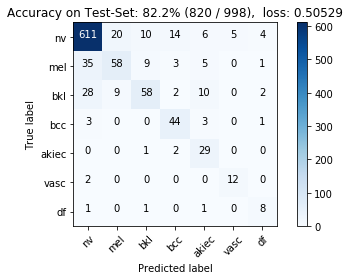

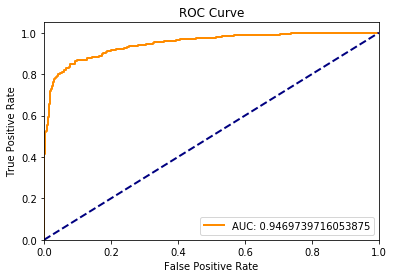

In [17]:
test_label_cls, test_pred_cls, test_pred_prob, acc, cm = print_test_result_all()

[Back to Content](#Content)

<a id='Part6_ResNet50'></a>
## Part 6 - Project Implementation - Transfer Learning using ResNet50

**Script:**  
check python script for more details:
- __[resnet50_3stage.py](resnet50_3stage.py)__

<a id='Part6_Create_structure'></a>
### 1. Load resney50 model using tf.slim

In [ ]:
resnet_model = nets.resnet_v1
with slim.arg_scope(resnet_model.resnet_arg_scope()):
    old_logit,_ = resnet_model.resnet_v1_50(inputs=image_inputs, num_classes=7, is_training=isTrain)

# restore some weights
exclude_variables = ['resnet_v1_50/logits/']
variables_to_restore = slim.get_variables_to_restore(exclude=exclude_variables)
saver_ckpt = tf.train.Saver(variables_to_restore)

##### Output layers

In [ ]:
with tf.variable_scope('MyPrediction'):
    logit_squeeze = tf.squeeze(old_logit, axis=(1,2), name='logit_squeeze')
    y_pred_softmax = tf.nn.softmax(logit_squeeze, name='pred_softmax')
    y_pred_cls = tf.argmax(y_pred_softmax, axis=1, name='pred_class')

<a id='Part6_Read_report'></a>
### 2. Read report file of model performance
Performance after 15 Epochs, , Click __[here](report/ResNet50_Dec5_ZXsHkIr.log)__ for full report.

![title](Support Files/resnet50_15.png)

[Back to Content](#Content)

<a id='Part7_Result'></a>
## Part 7 - Result and Conclusion

### 1. Result Summary:
- **VGG19 Model performance**:  
    - Training Accuracy 93%, loss 0.2  
    - Validation Accuracy 82.2%, loss 0.51
- **ResNet50 Model performance**:  
    - Training Accuracy 91.3%, loss 0.247  
    - Validation Accuracy 82%, loss 0.491  

### 2. Conclusion:
- With the full structure of VGG19 and ResNet50 model, the performance on both train and test dataset are similar.
- This performance is very good, already ***beats all the performance result in Kaggle kernels board!***
- For ***VGG19 model***, the trend for the performance is tend to approach to a ***balanced*** level, it's very difficult for the model to capture further feature. As a result, if need to achieve better performance, more ***fine-tuning*** need to be done in the network of the model.
- For ***ResNet50 model***, the performance of test dataset is swing between 80% and 82%, and the loss value is being up-and-down around 0.5, as a result, a ***learning rate decay algorithm*** need to be inserted into the model training optimization.

[Back to Content](#Content)

<a id='Part8_Project_Overview'></a>
## Part 8 - Reference

[1]  https://papers.nips.cc/paper/4824-imagenet-classification-with-deep-convolutional-neural-networks.pdf  
[2]  https://arxiv.org/pdf/1409.1556v6.pdf  
[3]  https://github.com/tensorflow/models/tree/master/research/slim  
[4]  https://www.tensorflow.org/tutorials/images/deep_cnn  
[5]  https://www.kaggle.com/kmader/skin-cancer-mnist-ham10000/kernels  
[6]  https://ieeexplore.ieee.org/abstract/document/7493528  
[7]  https://link.springer.com/chapter/10.1007%2F978-3-642-40763-5_50  
[8]  https://cs.stanford.edu/people/esteva/nature/  
[9]  https://www.mayoclinic.org/diseases-conditions/skin-cancer/symptoms-causes/syc-20377605  

[10] Simonyan, K., & Zisserman, A. (2014). Very deep convolutional networks for large-scale image recognition. arXiv preprint arXiv:1409.1556.  
[11] He, K., Zhang, X., Ren, S., & Sun, J. (2016). Deep residual learning for image recognition. In Proceedings of the IEEE conference on computer vision and pattern recognition (pp. 770-778).  
[12] Krizhevsky, A., Sutskever, I., & Hinton, G. E. (2012). Imagenet classification with deep convolutional neural networks. In Advances in neural information processing systems (pp. 1097-1105).  
[13] Pan, S. J., & Yang, Q. (2010). A survey on transfer learning. IEEE Transactions on knowledge and data engineering, 22(10), 1345-1359.  
[14] Deng, J., Dong, W., Socher, R., Li, L. J., Li, K., & Fei-Fei, L. (2009, June). Imagenet: A large-scale hierarchical image database. In Computer Vision and Pattern Recognition, 2009. CVPR 2009. IEEE Conference on (pp. 248-255). Ieee.  
[15] Hernández-García, A., & König, P. (2018). Do deep nets really need weight decay and dropout?. arXiv preprint arXiv:1802.07042.  
[16] Ioffe, S., & Szegedy, C. (2015). Batch normalization: Accelerating deep network training by reducing internal covariate shift. arXiv preprint arXiv:1502.03167.
[17] Díaz, G., & Romero, E. (2012). Micro‐structural tissue analysis for automatic histopathological image annotation. Microscopy research and technique, 75(3), 343-358.  
[18] Cruz-Roa, A., et al.: Automatic Annotation of Histopathological Images Using a Latent Topic Model Based On Non-negative Matrix Factorization. J. Pathol. Inform. 2(1), 4 (2011)  
[19] Cruz-Roa, A., et al.: Visual pattern mining in histology image collections using bag of features. Artif. Intell. Med. 52(2), 91–106 (2011)  
[20] Cruz-Roa, A., González, F., Galaro, J., Judkins, A.R., Ellison, D., Baccon, J., Madabhushi, A., Romero, E.: A visual latent semantic approach for automatic analysis and interpretation of anaplastic medulloblastoma virtual slides. In: Ayache, N., Delingette, H., Golland, P., Mori, K. (eds.) MICCAI 2012, Part I. LNCS, vol. 7510, pp. 157–164. Springer, Heidelberg (2012)  
[21] Pang, B., et al.: Cell nucleus segmentation in color histopathological imagery using convolutional networks. In: CCPR, pp. 1–5. IEEE (2010)  
[22] He, L., et al.: Histology image analysis for carcinoma detection and grading. Comput. Meth. Prog. Bio. (2012)  
[23] Le, Q.V., et al.: Building high-level features using large scale unsupervised learning. In: ICML (2011)  
[24] Raina, R., et al.: Self-taught learning: transfer learning from unlabeled data. In: ICML 2007, pp. 759–766 (2007)  
[25] Bengio, Y., et al.: Representation learning: A review and new perspectives. Arxiv (2012)  
[26] Montavon, G.: A machine learning approach to classification of low resolution histological samples. Master’s thesis (2009)  
[27] "Melanoma skin cancer", [online] Available: http://cancer.org/melanoma-skin-cancer-pdf.  
[28] K. Korotkov, R. Garcia, "Computerized analysis of pigmented skin lesions: A review", Artificial Intelligence in Medicine, vol. 56, no. 2, pp. 69-90, 2012.  
[29] A. Lomas, J. Leonardi-Bee, F. Bath-Hextall, "A systematic review of worldwide incidence of non-melanoma skin cancer", Br. J. Dermatol., vol. 166, no. 5, pp. 1069-1080, 2012.  
[30] L. Ballerini, R. B. Fisher, B. Aldridge, J. Rees, "A color and texture based hierarchical K-NN approach to the classification of non-melanoma skin lesions", Color Medical Image Analysis, vol. 6, pp. 63-86, 2013.  
[31] C. D. Leo, V. Bevilacqua, L. Ballerini, R. Fisher, B. Aldridge, J. Rees, "Hierarchical classification of ten skin lesion classes", Proc. Dundee Medical Image Analysis Workshop, 2015.  

<a id='Part9_License'></a>
## Part 9 - License

Copyright (c) 2018 Zeqiang Li, Yidi Xu and Mingguan Liu. Released under MIT. See __[license](License)__ for details.